In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/AI_ML/trum_tweet_sentiment_analysis.csv')  # Replace with your dataset path

In [ ]:
# Preprocessing function
def preprocess_text(text):
  text = text.lower() # Lowercase
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
  text = re.sub(r'\@\w+|\#', '', text) # Remove mentions/hashtags
  text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
  text = re.sub(r'\d+', '', text) # Remove numbers
# Remove stopwords and lemmatize
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
  return ' '.join(tokens)

In [ ]:
# Apply preprocessing
data['cleaned_text'] = data['text'].apply(preprocess_text)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
all_words = ' '.join(data['cleaned_text'])

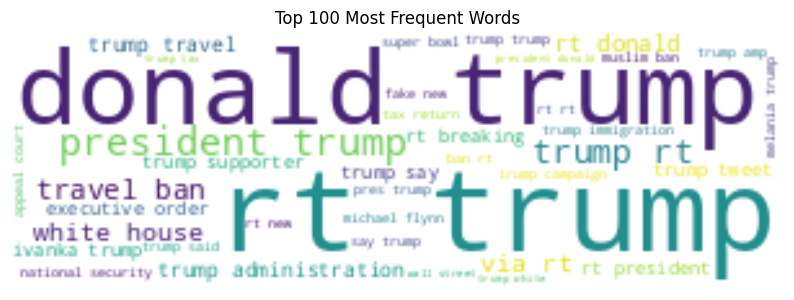

In [ ]:
# Visualize cleaned data with a word cloud
all_words = ' '.join(data['cleaned_text'])
wordcloud = WordCloud(width=300, height=100, background_color='white', max_words=100).generate(all_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()

In [ ]:
print(data.columns)

Index(['text', 'Sentiment', 'cleaned_text'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_text'],  # Features (text)
    data['Sentiment'],     # Labels (replace 'sentiment' with the correct column name if different)
    test_size=0.2,
    random_state=42
)

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
#Padding
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import LSTM

# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Training function
def train_model(model, X_train, y_train, X_val, y_val, model_name):
    checkpoint = ModelCheckpoint(f'best_{model_name}_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stop])
    return history

In [ ]:
# Train RNN model
rnn_history = train_model(rnn_model, X_train_pad, y_train, X_test_pad, y_test, 'rnn')


Epoch 1/10
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.2030
Epoch 1: val_accuracy improved from -inf to 0.95626, saving model to best_rnn_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - accuracy: 0.9191 - loss: 0.2030 - val_accuracy: 0.9563 - val_loss: 0.1231
Epoch 2/10
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9625 - loss: 0.1067
Epoch 2: val_accuracy improved from 0.95626 to 0.96033, saving model to best_rnn_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 145s 4ms/step - accuracy: 0.9625 - loss: 0.1067 - val_accuracy: 0.9603 - val_loss: 0.1135
Epoch 3/10
23116/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.0908
Epoch 3: val_accuracy improved from 0.96033 to 0.96357, saving model to best_rnn_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accuracy: 0.9691 - loss: 0.0908 - val_accuracy: 0.9636 - val_loss: 0.1075
Epoch 4/10
23114/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9722 - loss: 0.0822
Epoch 4: val_accuracy improved from 0.96357 to 0.96411, saving model to best_rnn_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step - accuracy: 0.9722 - loss: 0.0822 - val_accuracy: 0.9641 - val_loss: 0.1094
Epoch 5/10
23125/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.0781
Epoch 5: val_accuracy did not improve from 0.96411
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 99s 4ms/step - accuracy: 0.9738 - loss: 0.0781 - val_accuracy: 0.9641 - val_loss: 0.1107
Epoch 6/10
23120/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0755
Epoch 6: val_accuracy did not improve from 0.96411
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 93s 4ms/step - accuracy: 0.9747 - loss: 0.0755 - val_accuracy: 0.9630 - val_loss: 0.1093
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 3.


In [ ]:
# Train LSTM model
lstm_history = train_model(lstm_model, X_train_pad, y_train, X_test_pad, y_test, 'lstm')

Epoch 1/10
23126/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9258 - loss: 0.1870
Epoch 1: val_accuracy improved from -inf to 0.96396, saving model to best_lstm_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 157s 7ms/step - accuracy: 0.9258 - loss: 0.1870 - val_accuracy: 0.9640 - val_loss: 0.1027
Epoch 2/10
23123/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9688 - loss: 0.0894
Epoch 2: val_accuracy improved from 0.96396 to 0.96964, saving model to best_lstm_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 200s 7ms/step - accuracy: 0.9688 - loss: 0.0894 - val_accuracy: 0.9696 - val_loss: 0.0889
Epoch 3/10
23122/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9765 - loss: 0.0677
Epoch 3: val_accuracy improved from 0.96964 to 0.97208, saving model to best_lstm_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 203s 7ms/step - accuracy: 0.9765 - loss: 0.0677 - val_accuracy: 0.9721 - val_loss: 0.0820
Epoch 4/10
23120/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9814 - loss: 0.0536
Epoch 4: val_accuracy improved from 0.97208 to 0.97327, saving model to best_lstm_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 200s 7ms/step - accuracy: 0.9814 - loss: 0.0536 - val_accuracy: 0.9733 - val_loss: 0.0806
Epoch 5/10
23121/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.0442
Epoch 5: val_accuracy improved from 0.97327 to 0.97367, saving model to best_lstm_model.h5


23127/23127 ━━━━━━━━━━━━━━━━━━━━ 201s 7ms/step - accuracy: 0.9848 - loss: 0.0442 - val_accuracy: 0.9737 - val_loss: 0.0823
Epoch 6/10
23118/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9875 - loss: 0.0365
Epoch 6: val_accuracy did not improve from 0.97367
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 200s 6ms/step - accuracy: 0.9875 - loss: 0.0365 - val_accuracy: 0.9732 - val_loss: 0.0895
Epoch 7/10
23124/23127 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9896 - loss: 0.0304
Epoch 7: val_accuracy did not improve from 0.97367
23127/23127 ━━━━━━━━━━━━━━━━━━━━ 206s 7ms/step - accuracy: 0.9896 - loss: 0.0304 - val_accuracy: 0.9728 - val_loss: 0.0927
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    cm = confusion_matrix(y_test, y_pred_classes)
    cr = classification_report(y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

In [ ]:
# Check for NaN values in y_test
nan_indices = np.isnan(y_test)

In [ ]:
# Print the number of NaN values
print(f"Number of NaN values in y_test: {np.sum(nan_indices)}")

Number of NaN values in y_test: 0


In [ ]:
# Option 1: Remove entries with NaN values
X_test_pad_clean = X_test_pad[~nan_indices]
y_test_clean = y_test[~nan_indices]

In [ ]:
# Evaluate the model with the cleaned data
evaluate_model(rnn_model, X_test_pad_clean, y_test_clean)

11564/11564 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
Accuracy: 0.9636
Confusion Matrix:
[[242042   6521]
 [  6958 114504]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    248563
           1       0.95      0.94      0.94    121462

    accuracy                           0.96    370025
   macro avg       0.96      0.96      0.96    370025
weighted avg       0.96      0.96      0.96    370025



In [ ]:
# Evaluate the model with the cleaned data
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_classes)
    cm = confusion_matrix(y_test, y_pred_classes)
    cr = classification_report(y_test, y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)

In [ ]:
# Evaluate LSTM model
evaluate_model(lstm_model, X_test_pad_clean, y_test_clean)

11564/11564 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
Accuracy: 0.9733
Confusion Matrix:
[[244214   4349]
 [  5542 115920]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    248563
           1       0.96      0.95      0.96    121462

    accuracy                           0.97    370025
   macro avg       0.97      0.97      0.97    370025
weighted avg       0.97      0.97      0.97    370025



In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


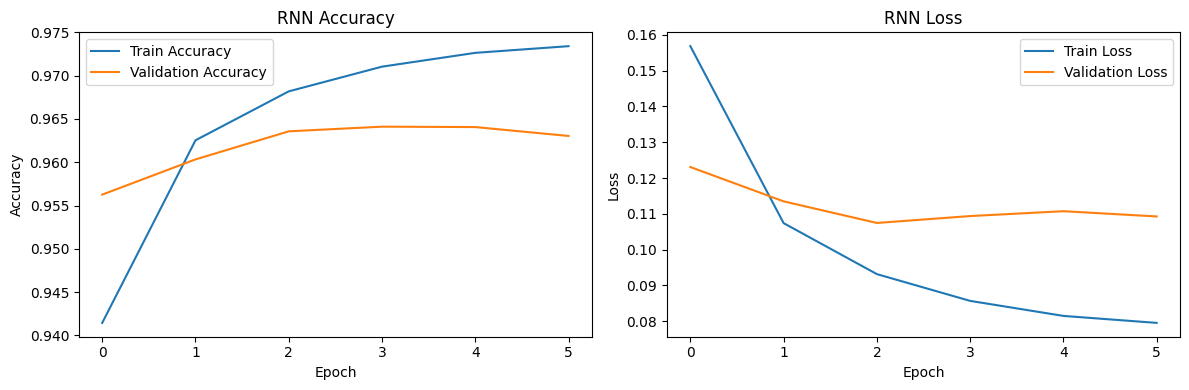

In [ ]:
# Plot RNN history
plot_history(rnn_history, 'RNN')

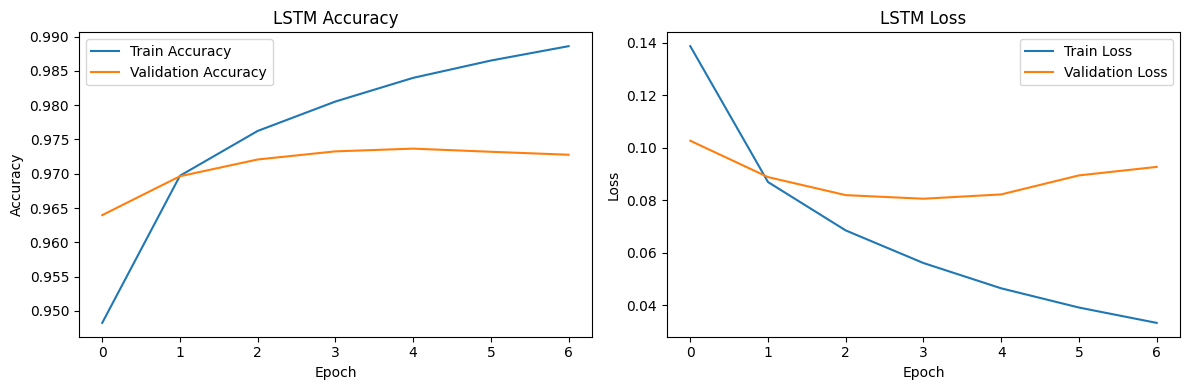

In [ ]:
# Plot LSTM history
plot_history(lstm_history, 'LSTM')

In [ ]:
# Gradio interface for real-time prediction
def predict_sentiment(text):
    cleaned_input = preprocess_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_input])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post', truncating='post')
    prediction = lstm_model.predict(padded_sequence)
    return "Positive" if prediction > 0.5 else "Negative"

In [ ]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr


In [ ]:
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=2, placeholder="Enter a tweet..."),
    outputs=gr.Text()
)


In [ ]:
# Launch the interface
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8c19a3f0e523651da5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
